Kaggle DataSet Link : https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from matplotlib import style
%matplotlib inline

In [3]:
df=pd.read_csv('/kaggle/input/gold-price-data/gld_price_data.csv')
df.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.shape

(2290, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


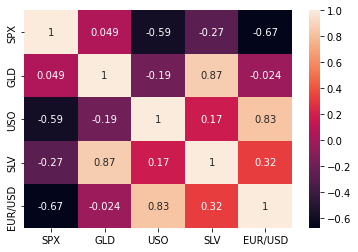

In [8]:
sns.heatmap(df.corr(),annot=True);

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


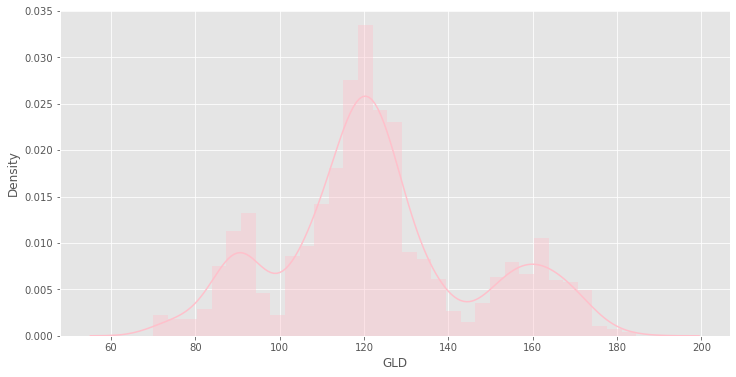

In [15]:
plt.figure(figsize=(12,6))
sns.distplot(df['GLD'],color='pink');

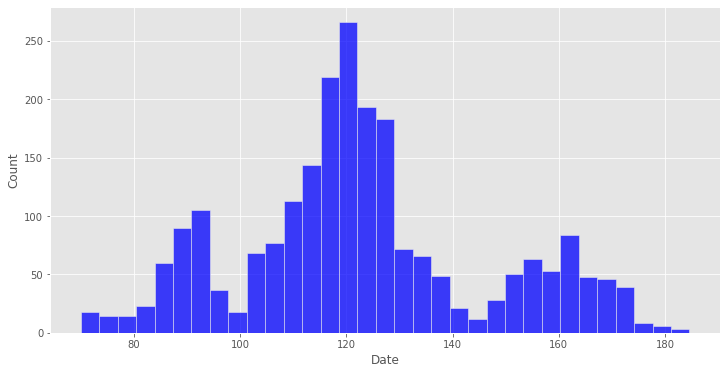

In [14]:
style.use('ggplot')
plt.figure(figsize=(12,6))
sns.histplot(df['GLD'],color='Blue')
plt.xlabel('Date')
plt.show()

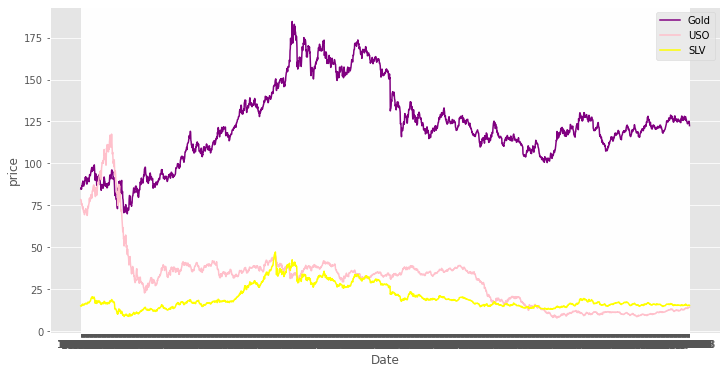

In [18]:
style.use('ggplot')
plt.figure(figsize=(12,6))
plt.plot(df['Date'].values,df['GLD'],color='purple',label='Gold')
plt.plot(df['Date'].values,df['USO'],color='pink',label='USO')
plt.plot(df['Date'].values,df['SLV'],color='yellow',label='SLV')
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()
plt.show()

In [19]:
x=df.drop(['Date','GLD'],axis=1) 
y=df['GLD']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=2)

In [22]:
rfr = RandomForestRegressor(n_estimators=100)

In [23]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [25]:
pred = rfr.predict(x_test)

In [28]:
error = metrics.r2_score(y_test,pred)
print("R2 Score :" ,error)

R2 Score : 0.9893492123548323
